FINAL CODE
- To VIEW HEATMAP: MAY NEED TO MAKE A COPY IN COLLAB
- HEATMAP IS BASED ON USER-INPUTS of WEATHER CONDITIONS

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive/')

In [ ]:
# import necessary libraries

import pandas as pd
import requests
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data/Motor_Vehicle_Collisions_-_Crashes.csv")

In [ ]:
#load data - use this if not taking CSV from google drive

url = "https://data.cityofnewyork.us/api/views/h9gi-nx95/rows.csv?accessType=DOWNLOAD"

data = pd.read_csv(url)  # This file is 412MB so it may take about 4 mins to download

<ipython-input-4-2a349c099939>:5: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(url)  # This file is 412MB so it may take about 4 mins to download


Data Cleaning/Missing Data Handling:

In [ ]:
# Check data types
data.dtypes

CRASH DATE                        object
CRASH TIME                        object
BOROUGH                           object
ZIP CODE                          object
LATITUDE                         float64
LONGITUDE                        float64
LOCATION                          object
ON STREET NAME                    object
CROSS STREET NAME                 object
OFF STREET NAME                   object
NUMBER OF PERSONS INJURED        float64
NUMBER OF PERSONS KILLED         float64
NUMBER OF PEDESTRIANS INJURED      int64
NUMBER OF PEDESTRIANS KILLED       int64
NUMBER OF CYCLIST INJURED          int64
NUMBER OF CYCLIST KILLED           int64
NUMBER OF MOTORIST INJURED         int64
NUMBER OF MOTORIST KILLED          int64
CONTRIBUTING FACTOR VEHICLE 1     object
CONTRIBUTING FACTOR VEHICLE 2     object
CONTRIBUTING FACTOR VEHICLE 3     object
CONTRIBUTING FACTOR VEHICLE 4     object
CONTRIBUTING FACTOR VEHICLE 5     object
COLLISION_ID                       int64
VEHICLE TYPE COD

In [ ]:
# Describe the numerical data
data.describe()

,LATITUDE,LONGITUDE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,COLLISION_ID
count,1.819165e+06,1.819165e+06,2.051272e+06,2.051259e+06,2.051290e+06,2.051290e+06,2.051290e+06,2.051290e+06,2.051290e+06,2.051290e+06,2.051290e+06
mean,4.062750e+01,-7.375180e+01,3.068408e-01,1.475679e-03,5.591847e-02,7.341722e-04,2.666322e-02,1.126121e-04,2.207767e-01,6.059602e-04,3.141503e+06
std,1.983081e+00,3.729181e+00,6.971833e-01,4.042745e-02,2.428357e-01,2.756734e-02,1.631091e-01,1.065713e-02,6.582230e-01,2.679026e-02,1.504622e+06
min,0.000000e+00,-2.013600e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.200000e+01
25%,4.066786e+01,-7.397490e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.148942e+06
50%,4.072089e+01,-7.392728e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.661880e+06
75%,4.076959e+01,-7.386673e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.174945e+06
max,4.334444e+01,0.000000e+00,4.300000e+01,8.000000e+00,2.700000e+01,6.000000e+00,4.000000e+00,2.000000e+00,4.300000e+01,5.000000e+00,4.688084e+06


In [ ]:
# check NAs the data set
data.isnull().sum()

data.columns

Index(['CRASH DATE', 'CRASH TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE',
       'LONGITUDE', 'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME',
       'OFF STREET NAME', 'NUMBER OF PERSONS INJURED',
       'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED',
       'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED',
       'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED',
       'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1',
       'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3',
       'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5',
       'COLLISION_ID', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2',
       'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5'],
      dtype='object')

In [ ]:
# Drop the "ON STREET NAME", "CROSS STREET NAME", "OFF STREET NAME", "COLLISION_ID", "LOCATION" columns

data_cleaned_transformation = data.drop(columns=['ON STREET NAME', 'CROSS STREET NAME','OFF STREET NAME','COLLISION_ID','LOCATION'])

# check if it works
data_cleaned_transformation.isnull().sum()

CRASH DATE                             0
CRASH TIME                             0
BOROUGH                           638127
ZIP CODE                          638375
LATITUDE                          232125
LONGITUDE                         232125
NUMBER OF PERSONS INJURED             18
NUMBER OF PERSONS KILLED              31
NUMBER OF PEDESTRIANS INJURED          0
NUMBER OF PEDESTRIANS KILLED           0
NUMBER OF CYCLIST INJURED              0
NUMBER OF CYCLIST KILLED               0
NUMBER OF MOTORIST INJURED             0
NUMBER OF MOTORIST KILLED              0
CONTRIBUTING FACTOR VEHICLE 1       6608
CONTRIBUTING FACTOR VEHICLE 2     315687
CONTRIBUTING FACTOR VEHICLE 3    1905241
CONTRIBUTING FACTOR VEHICLE 4    2018431
CONTRIBUTING FACTOR VEHICLE 5    2042397
VEHICLE TYPE CODE 1                13256
VEHICLE TYPE CODE 2               388087
VEHICLE TYPE CODE 3              1910459
VEHICLE TYPE CODE 4              2019550
VEHICLE TYPE CODE 5              2042666
dtype: int64

In [ ]:
data_cleaned_transformation

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,...,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/11/2021,2:39,NaN,NaN,NaN,NaN,2.0,0.0,0,0,...,Aggressive Driving/Road Rage,Unspecified,NaN,NaN,NaN,Sedan,Sedan,NaN,NaN,NaN
1,03/26/2022,11:45,NaN,NaN,NaN,NaN,1.0,0.0,0,0,...,Pavement Slippery,NaN,NaN,NaN,NaN,Sedan,NaN,NaN,NaN,NaN
2,06/29/2022,6:55,NaN,NaN,NaN,NaN,0.0,0.0,0,0,...,Following Too Closely,Unspecified,NaN,NaN,NaN,Sedan,Pick-up Truck,NaN,NaN,NaN
3,09/11/2021,9:35,BROOKLYN,11208.0,40.667202,-73.866500,0.0,0.0,0,0,...,Unspecified,NaN,NaN,NaN,NaN,Sedan,NaN,NaN,NaN,NaN
4,12/14/2021,8:13,BROOKLYN,11233.0,40.683304,-73.917274,0.0,0.0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2051285,12/15/2023,21:52,QUEENS,11362.0,40.770176,-73.733590,0.0,0.0,0,0,...,Driver Inattention/Distraction,Unspecified,NaN,NaN,NaN,Sedan,Pick-up Truck,NaN,NaN,NaN
2051286,12/15/2023,6:50,NaN,NaN,40.828133,-73.845180,1.0,0.0,0,0,...,Passenger Distraction,Unspecified,NaN,NaN,NaN,Carry All,Sedan,NaN,NaN,NaN
2051287,12/14/2023,12:04,NaN,NaN,40.845467,-73.928130,0.0,0.0,0,0,...,Unspecified,Unspecified,NaN,NaN,NaN,Sedan,Tractor Truck Diesel,NaN,NaN,NaN
2051288,12/14/2023,0:10,BRONX,10451.0,40.821175,-73.925740,0.0,0.0,0,0,...,Driver Inattention/Distraction,Unspecified,NaN,NaN,NaN,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN


In [ ]:
# checking for duplicates

duplicate_df = data_cleaned_transformation[data_cleaned_transformation.duplicated()]
duplicate_df.shape

(2487, 24)

In [ ]:
# checking for uniques (checking for typos)
data_cleaned_transformation['CONTRIBUTING FACTOR VEHICLE 1'].unique()

# convert 'illnes' to 'illness'
data_cleaned_transformation['CONTRIBUTING FACTOR VEHICLE 1'] = data_cleaned_transformation['CONTRIBUTING FACTOR VEHICLE 1'].replace('Drugs (Illegal)', 'Drugs (illegal)')
# convert 'Drugs (Illegal)' to 'Drugs (illegal)'
data_cleaned_transformation['CONTRIBUTING FACTOR VEHICLE 1'] = data_cleaned_transformation['CONTRIBUTING FACTOR VEHICLE 1'].replace('Illnes', 'Illness')

<Axes: >

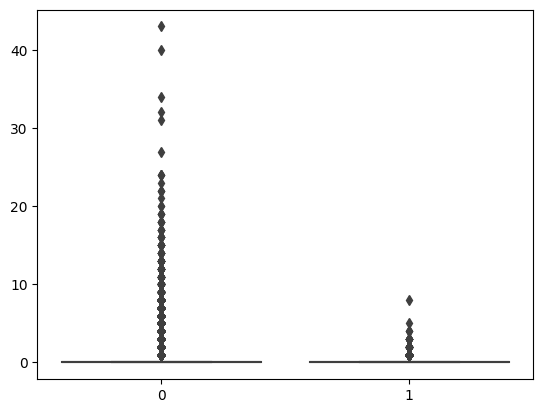

In [ ]:
# checking for outliers through boxplot

import seaborn as sns
sns.boxplot(data=[data_cleaned_transformation['NUMBER OF PERSONS INJURED'], data_cleaned_transformation['NUMBER OF PERSONS KILLED']])
#data.boxplot(column=['NUMBER OF PERSONS INJURED'])
#data.boxplot(column=['NUMBER OF PERSONS KILLED'])

# No outliers present

Analysis of crash contributing factors:

In [ ]:
crash_data = data_cleaned_transformation
crash_data.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,...,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/11/2021,2:39,NaN,NaN,NaN,NaN,2.0,0.0,0,0,...,Aggressive Driving/Road Rage,Unspecified,NaN,NaN,NaN,Sedan,Sedan,NaN,NaN,NaN
1,03/26/2022,11:45,NaN,NaN,NaN,NaN,1.0,0.0,0,0,...,Pavement Slippery,NaN,NaN,NaN,NaN,Sedan,NaN,NaN,NaN,NaN
2,06/29/2022,6:55,NaN,NaN,NaN,NaN,0.0,0.0,0,0,...,Following Too Closely,Unspecified,NaN,NaN,NaN,Sedan,Pick-up Truck,NaN,NaN,NaN
3,09/11/2021,9:35,BROOKLYN,11208.0,40.667202,-73.866500,0.0,0.0,0,0,...,Unspecified,NaN,NaN,NaN,NaN,Sedan,NaN,NaN,NaN,NaN
4,12/14/2021,8:13,BROOKLYN,11233.0,40.683304,-73.917274,0.0,0.0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Merging Weather Data:

In [ ]:
# creates weather dataframe from JFK.csv
weather_data = pd.read_csv("JFK.csv")

# rename column 'valid' to weather_date
weather_data.rename(columns={'valid': 'weather_date'}, inplace=True)

# changes type of weather_date to pandas datetime
weather_data['weather_date'] = pd.to_datetime(weather_data['weather_date'], errors='coerce')

In [ ]:
weather_data.head()

,station,weather_date,tmpf,sped,p01i,vsby,wxcodes,ice_accretion_1hr,snowdepth
0,JFK,2012-01-01 00:51:00,46.00,10.35,0.00,10.00,M,M,M
1,JFK,2012-01-01 01:51:00,46.00,10.35,M,10.00,M,M,M
2,JFK,2012-01-01 02:51:00,45.00,8.05,M,10.00,M,M,M
3,JFK,2012-01-01 03:51:00,43.00,0.00,M,10.00,M,M,M
4,JFK,2012-01-01 04:51:00,39.00,5.75,M,10.00,M,M,M


In [ ]:
# categorizing weather time into 4 hour blocks

# Convert 'weather_date' to datetime format
weather_data['weather_date'] = pd.to_datetime(weather_data['weather_date'])

# Define a custom function to round down to the nearest interval. Weather gets
# recorded at xx:51, so we want to have our TIME_BLOCKS start closer to the end
# of the hour than the start, i.e if weather is recorded at 00:51, we want the
# TIME_BLOCK to start at 1:00 instead of 0:00 to be more accurate

def round_down_to_interval(dt, interval):
    return pd.to_datetime((dt.floor(interval) + pd.DateOffset(minutes=60)))

# Define the interval for the time blocks (e.g., 4 hours)
block_interval = '4H'

# # Create a new column 'TIME_BLOCK' representing unique 4-hour blocks
# weather_data['TIME_BLOCK'] = pd.to_datetime(weather_data['weather_date']).dt.floor('4H')

# Create a new column 'TIME_BLOCK' representing unique 4-hour blocks
weather_data['TIME_BLOCK'] = weather_data['weather_date'].apply(lambda x: round_down_to_interval(x, block_interval))

# removes the 3 rows after the time block starts, i.e keeps only the weather row
# that represents the start of the time block
weather_data = weather_data.drop_duplicates(subset=['TIME_BLOCK'])

# Print the updated DataFrame
weather_data.head()

,station,weather_date,tmpf,sped,p01i,vsby,wxcodes,ice_accretion_1hr,snowdepth,TIME_BLOCK
0,JFK,2012-01-01 00:51:00,46.00,10.35,0.00,10.00,M,M,M,2012-01-01 01:00:00
4,JFK,2012-01-01 04:51:00,39.00,5.75,M,10.00,M,M,M,2012-01-01 05:00:00
8,JFK,2012-01-01 08:51:00,44.00,4.60,M,10.00,M,M,M,2012-01-01 09:00:00
12,JFK,2012-01-01 12:51:00,50.00,13.80,M,10.00,M,M,M,2012-01-01 13:00:00
16,JFK,2012-01-01 16:51:00,48.00,13.80,M,10.00,M,M,M,2012-01-01 17:00:00


In [ ]:
# categorizing temperature

# handles non-numeric values
weather_data['tmpf'] = pd.to_numeric(weather_data['tmpf'], errors='coerce')

# Define temperature bins
temp_bins = [-float('inf'), 30, 33, 50, 75, float('inf')]
temp_labels = ['BELOW_FREEZING', 'FREEZING', 'MILD', 'WARM', 'HOT']

# Categorize the 'tmpf' column
weather_data['TEMP_RANGES'] = pd.cut(weather_data['tmpf'], bins=temp_bins, labels=temp_labels, right=False)

weather_data.head()

# DROP these columns when done with all categorizations
# weather_data.drop('tmpf', axis=1, inplace=True)

<ipython-input-17-893a1f7447aa>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_data['tmpf'] = pd.to_numeric(weather_data['tmpf'], errors='coerce')
<ipython-input-17-893a1f7447aa>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_data['TEMP_RANGES'] = pd.cut(weather_data['tmpf'], bins=temp_bins, labels=temp_labels, right=False)


,station,weather_date,tmpf,sped,p01i,vsby,wxcodes,ice_accretion_1hr,snowdepth,TIME_BLOCK,TEMP_RANGES
0,JFK,2012-01-01 00:51:00,46.0,10.35,0.00,10.00,M,M,M,2012-01-01 01:00:00,MILD
4,JFK,2012-01-01 04:51:00,39.0,5.75,M,10.00,M,M,M,2012-01-01 05:00:00,MILD
8,JFK,2012-01-01 08:51:00,44.0,4.60,M,10.00,M,M,M,2012-01-01 09:00:00,MILD
12,JFK,2012-01-01 12:51:00,50.0,13.80,M,10.00,M,M,M,2012-01-01 13:00:00,WARM
16,JFK,2012-01-01 16:51:00,48.0,13.80,M,10.00,M,M,M,2012-01-01 17:00:00,MILD


In [ ]:
import numpy as np

# categorizing precipitation

# handles non-numeric values
weather_data['p01i'] = pd.to_numeric(weather_data['p01i'], errors='coerce')

# Define precipitation bins
precipitation_bins = [0, 0.01, 0.1, 0.25, 0.5, np.inf]
precipitation_labels = ['NONE', 'TRACE', 'LIGHT', 'MODERATE', 'HEAVY']

# Categorize the 'p01i' column
weather_data['PRECIP_CATEGORY'] = pd.cut(weather_data['p01i'], bins=precipitation_bins, labels=precipitation_labels, right=False)

weather_data.head(10)

# weather_data.drop('p01i', axis=1, inplace=True)

<ipython-input-18-3fdb952229dc>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_data['p01i'] = pd.to_numeric(weather_data['p01i'], errors='coerce')
<ipython-input-18-3fdb952229dc>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_data['PRECIP_CATEGORY'] = pd.cut(weather_data['p01i'], bins=precipitation_bins, labels=precipitation_labels, right=False)


,station,weather_date,tmpf,sped,p01i,vsby,wxcodes,ice_accretion_1hr,snowdepth,TIME_BLOCK,TEMP_RANGES,PRECIP_CATEGORY
0,JFK,2012-01-01 00:51:00,46.0,10.35,0.00,10.00,M,M,M,2012-01-01 01:00:00,MILD,NONE
4,JFK,2012-01-01 04:51:00,39.0,5.75,NaN,10.00,M,M,M,2012-01-01 05:00:00,MILD,NaN
8,JFK,2012-01-01 08:51:00,44.0,4.60,NaN,10.00,M,M,M,2012-01-01 09:00:00,MILD,NaN
12,JFK,2012-01-01 12:51:00,50.0,13.80,NaN,10.00,M,M,M,2012-01-01 13:00:00,WARM,NaN
16,JFK,2012-01-01 16:51:00,48.0,13.80,NaN,10.00,M,M,M,2012-01-01 17:00:00,MILD,NaN
20,JFK,2012-01-01 20:51:00,49.0,20.70,0.05,7.00,-RA,M,M,2012-01-01 21:00:00,MILD,TRACE
24,JFK,2012-01-02 00:51:00,49.0,13.80,NaN,10.00,M,M,M,2012-01-02 01:00:00,MILD,NaN
28,JFK,2012-01-02 04:51:00,42.0,20.70,NaN,10.00,M,M,M,2012-01-02 05:00:00,MILD,NaN
32,JFK,2012-01-02 08:51:00,38.0,17.25,NaN,10.00,M,M,M,2012-01-02 09:00:00,MILD,NaN
36,JFK,2012-01-02 12:51:00,42.0,21.85,NaN,10.00,M,M,M,2012-01-02 13:00:00,MILD,NaN


In [ ]:
# categorizing wind

# handles non-numeric values
weather_data['sped'] = pd.to_numeric(weather_data['sped'], errors='coerce')

# Define wind bins
wind_speed_bins = [0, 5, 15, 25, np.inf]
wind_speed_labels = ['CALM', 'LIGHT', 'MODERATE', 'STRONG']

# Categorize the 'sped' column
weather_data['WIND_SPEED_CATEGORY'] = pd.cut(weather_data['sped'], bins=wind_speed_bins, labels=wind_speed_labels, right=False)

weather_data.head()

# weather_data.drop('sped', axis=1, inplace=True)

<ipython-input-19-4dce768d816c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_data['sped'] = pd.to_numeric(weather_data['sped'], errors='coerce')
<ipython-input-19-4dce768d816c>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_data['WIND_SPEED_CATEGORY'] = pd.cut(weather_data['sped'], bins=wind_speed_bins, labels=wind_speed_labels, right=False)


,station,weather_date,tmpf,sped,p01i,vsby,wxcodes,ice_accretion_1hr,snowdepth,TIME_BLOCK,TEMP_RANGES,PRECIP_CATEGORY,WIND_SPEED_CATEGORY
0,JFK,2012-01-01 00:51:00,46.0,10.35,0.0,10.00,M,M,M,2012-01-01 01:00:00,MILD,NONE,LIGHT
4,JFK,2012-01-01 04:51:00,39.0,5.75,NaN,10.00,M,M,M,2012-01-01 05:00:00,MILD,NaN,LIGHT
8,JFK,2012-01-01 08:51:00,44.0,4.60,NaN,10.00,M,M,M,2012-01-01 09:00:00,MILD,NaN,CALM
12,JFK,2012-01-01 12:51:00,50.0,13.80,NaN,10.00,M,M,M,2012-01-01 13:00:00,WARM,NaN,LIGHT
16,JFK,2012-01-01 16:51:00,48.0,13.80,NaN,10.00,M,M,M,2012-01-01 17:00:00,MILD,NaN,LIGHT


In [ ]:
# categorizing visibility

# handles non-numeric values
weather_data['vsby'] = pd.to_numeric(weather_data['sped'], errors='coerce')

# define visibility bins
visibility_bins = [0, 0.5, 1, 3, 10, np.inf]
visibility_labels = ['VERY_LOW', 'LOW', 'MODERATE', 'HIGH', 'VERY_HIGH']

# Categorize the 'vsby' column
weather_data['VISIBILITY_CATEGORY'] = pd.cut(weather_data['vsby'], bins=visibility_bins, labels=visibility_labels, right=False)

weather_data.head()

# weather_data.drop('vsby', axis=1, inplace=True)

<ipython-input-20-c6dbdc254f1c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_data['vsby'] = pd.to_numeric(weather_data['sped'], errors='coerce')
<ipython-input-20-c6dbdc254f1c>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_data['VISIBILITY_CATEGORY'] = pd.cut(weather_data['vsby'], bins=visibility_bins, labels=visibility_labels, right=False)


,station,weather_date,tmpf,sped,p01i,vsby,wxcodes,ice_accretion_1hr,snowdepth,TIME_BLOCK,TEMP_RANGES,PRECIP_CATEGORY,WIND_SPEED_CATEGORY,VISIBILITY_CATEGORY
0,JFK,2012-01-01 00:51:00,46.0,10.35,0.0,10.35,M,M,M,2012-01-01 01:00:00,MILD,NONE,LIGHT,VERY_HIGH
4,JFK,2012-01-01 04:51:00,39.0,5.75,NaN,5.75,M,M,M,2012-01-01 05:00:00,MILD,NaN,LIGHT,HIGH
8,JFK,2012-01-01 08:51:00,44.0,4.60,NaN,4.60,M,M,M,2012-01-01 09:00:00,MILD,NaN,CALM,HIGH
12,JFK,2012-01-01 12:51:00,50.0,13.80,NaN,13.80,M,M,M,2012-01-01 13:00:00,WARM,NaN,LIGHT,VERY_HIGH
16,JFK,2012-01-01 16:51:00,48.0,13.80,NaN,13.80,M,M,M,2012-01-01 17:00:00,MILD,NaN,LIGHT,VERY_HIGH


In [ ]:
# creating a boolean flag for weather event types

# **** Not sure if this is what he meant by boolean flag ***

weather_data['SIGNIFICANT_WEATHER'] = weather_data['wxcodes'] != 'M'

weather_data.head(25)

,station,weather_date,tmpf,sped,p01i,vsby,wxcodes,ice_accretion_1hr,snowdepth,TIME_BLOCK,TEMP_RANGES,PRECIP_CATEGORY,WIND_SPEED_CATEGORY,VISIBILITY_CATEGORY,SIGNIFICANT_WEATHER
0,JFK,2012-01-01 00:51:00,46.0,10.35,0.00,10.35,M,M,M,2012-01-01 01:00:00,MILD,NONE,LIGHT,VERY_HIGH,False
4,JFK,2012-01-01 04:51:00,39.0,5.75,NaN,5.75,M,M,M,2012-01-01 05:00:00,MILD,NaN,LIGHT,HIGH,False
8,JFK,2012-01-01 08:51:00,44.0,4.60,NaN,4.60,M,M,M,2012-01-01 09:00:00,MILD,NaN,CALM,HIGH,False
12,JFK,2012-01-01 12:51:00,50.0,13.80,NaN,13.80,M,M,M,2012-01-01 13:00:00,WARM,NaN,LIGHT,VERY_HIGH,False
16,JFK,2012-01-01 16:51:00,48.0,13.80,NaN,13.80,M,M,M,2012-01-01 17:00:00,MILD,NaN,LIGHT,VERY_HIGH,False
20,JFK,2012-01-01 20:51:00,49.0,20.70,0.05,20.70,-RA,M,M,2012-01-01 21:00:00,MILD,TRACE,MODERATE,VERY_HIGH,True
24,JFK,2012-01-02 00:51:00,49.0,13.80,NaN,13.80,M,M,M,2012-01-02 01:00:00,MILD,NaN,LIGHT,VERY_HIGH,False
28,JFK,2012-01-02 04:51:00,42.0,20.70,NaN,20.70,M,M,M,2012-01-02 05:00:00,MILD,NaN,MODERATE,VERY_HIGH,False
32,JFK,2012-01-02 08:51:00,38.0,17.25,NaN,17.25,M,M,M,2012-01-02 09:00:00,MILD,NaN,MODERATE,VERY_HIGH,False
36,JFK,2012-01-02 12:51:00,42.0,21.85,NaN,21.85,M,M,M,2012-01-02 13:00:00,MILD,NaN,MODERATE,VERY_HIGH,False


In [ ]:
# Combine 'CRASH DATE' and 'CRASH TIME' columns to create 'CRASH DATETIME', convert to pandas datetime
crash_data['CRASH DATETIME'] = pd.to_datetime(crash_data['CRASH DATE'].astype(str) + ' ' + crash_data['CRASH TIME'].astype(str))

In [ ]:
# Convert 'CRASH DATETIME' to datetime format
crash_data['CRASH DATETIME'] = pd.to_datetime(crash_data['CRASH DATETIME'])

# Define the interval for the time blocks (e.g., 4 hours)
block_interval = '4H'

# Create a new column 'TIME_BLOCK' representing unique 4-hour blocks
crash_data['TIME_BLOCK'] = crash_data['CRASH DATETIME'].dt.floor(block_interval) + pd.to_timedelta('1H')

# Remove the 3 rows after the time block starts, keeping only the crash data row
# that represents the start of the time block
crash_data = crash_data.drop_duplicates(subset=['TIME_BLOCK'])

crash_data.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,...,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,CRASH DATETIME,TIME_BLOCK
0,09/11/2021,2:39,NaN,NaN,NaN,NaN,2.0,0.0,0,0,...,NaN,NaN,NaN,Sedan,Sedan,NaN,NaN,NaN,2021-09-11 02:39:00,2021-09-11 01:00:00
1,03/26/2022,11:45,NaN,NaN,NaN,NaN,1.0,0.0,0,0,...,NaN,NaN,NaN,Sedan,NaN,NaN,NaN,NaN,2022-03-26 11:45:00,2022-03-26 09:00:00
2,06/29/2022,6:55,NaN,NaN,NaN,NaN,0.0,0.0,0,0,...,NaN,NaN,NaN,Sedan,Pick-up Truck,NaN,NaN,NaN,2022-06-29 06:55:00,2022-06-29 05:00:00
3,09/11/2021,9:35,BROOKLYN,11208.0,40.667202,-73.866500,0.0,0.0,0,0,...,NaN,NaN,NaN,Sedan,NaN,NaN,NaN,NaN,2021-09-11 09:35:00,2021-09-11 09:00:00
4,12/14/2021,8:13,BROOKLYN,11233.0,40.683304,-73.917274,0.0,0.0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-12-14 08:13:00,2021-12-14 09:00:00


In [ ]:
# sort key values to be merged
crash_data.sort_values('TIME_BLOCK', inplace=True)
weather_data.sort_values('TIME_BLOCK', inplace=True)

# Merge DataFrames based on the common column 'CRASH DATETIME' and 'weather_date'
merged_df = pd.merge_asof(crash_data, weather_data, left_on='TIME_BLOCK', right_on='TIME_BLOCK', direction='nearest')

# Set 'TIME_BLOCK' column as the index
crash_data.set_index('TIME_BLOCK', inplace=True)
# Move 'TIME_BLOCK' index to the first column
crash_data.reset_index(inplace=True)

merged_df.tail(30)


#merged_df.to_csv('merged_df.csv', index=False)

<ipython-input-81-d00979be5487>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crash_data.sort_values('TIME_BLOCK', inplace=True)


,TIME_BLOCK,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,...,p01i,vsby,wxcodes,ice_accretion_1hr,snowdepth,TEMP_RANGES,PRECIP_CATEGORY,WIND_SPEED_CATEGORY,VISIBILITY_CATEGORY,SIGNIFICANT_WEATHER
25080,2023-12-11 01:00:00,12/11/2023,1:20,QUEENS,11369.0,40.764965,-73.865480,0.0,0.0,0,...,0.05,18.40,+RA BR,M,M,WARM,TRACE,MODERATE,VERY_HIGH,True
25081,2023-12-11 05:00:00,12/11/2023,6:06,NaN,NaN,40.704525,-73.928406,0.0,0.0,0,...,0.05,14.95,-RA,M,M,MILD,TRACE,LIGHT,VERY_HIGH,True
25082,2023-12-11 09:00:00,12/11/2023,10:34,NaN,NaN,40.685320,-73.980710,0.0,0.0,0,...,NaN,19.55,-RA,M,M,MILD,NaN,MODERATE,VERY_HIGH,True
25083,2023-12-11 13:00:00,12/11/2023,15:20,BROOKLYN,11222.0,40.726402,-73.936060,0.0,0.0,0,...,0.00,19.55,M,M,M,MILD,NONE,MODERATE,VERY_HIGH,False
25084,2023-12-11 17:00:00,12/11/2023,17:10,NaN,NaN,40.732037,-73.814926,2.0,0.0,0,...,0.00,21.85,M,M,M,MILD,NONE,MODERATE,VERY_HIGH,False
25085,2023-12-11 21:00:00,12/11/2023,20:39,BROOKLYN,11236.0,40.637905,-73.887800,5.0,0.0,0,...,0.00,16.10,M,M,M,MILD,NONE,MODERATE,VERY_HIGH,False
25086,2023-12-12 01:00:00,12/12/2023,0:05,BROOKLYN,11235.0,40.580380,-73.967606,1.0,0.0,1,...,0.00,12.65,M,M,M,MILD,NONE,LIGHT,VERY_HIGH,False
25087,2023-12-12 05:00:00,12/12/2023,6:52,BROOKLYN,11207.0,40.678160,-73.897484,1.0,0.0,0,...,0.00,10.35,M,M,M,MILD,NONE,LIGHT,VERY_HIGH,False
25088,2023-12-12 09:00:00,12/12/2023,8:50,MANHATTAN,10027.0,40.812860,-73.963410,0.0,0.0,0,...,0.00,12.65,M,M,M,MILD,NONE,LIGHT,VERY_HIGH,False
25089,2023-12-12 13:00:00,12/12/2023,15:20,BROOKLYN,11235.0,40.589565,-73.939804,0.0,0.0,0,...,0.00,16.10,M,M,M,MILD,NONE,MODERATE,VERY_HIGH,False


In [ ]:
# Display the column names in your DataFrame
merged_df['CRASH_OCCURRED'] = 1
print(merged_df.columns)



Index(['TIME_BLOCK', 'CRASH DATE', 'CRASH TIME', 'BOROUGH', 'ZIP CODE',
       'LATITUDE', 'LONGITUDE', 'NUMBER OF PERSONS INJURED',
       'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED',
       'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED',
       'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED',
       'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1',
       'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3',
       'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5',
       'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2', 'VEHICLE TYPE CODE 3',
       'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5', 'CRASH DATETIME',
       'station', 'weather_date', 'tmpf', 'sped', 'p01i', 'vsby', 'wxcodes',
       'ice_accretion_1hr', 'snowdepth', 'TEMP_RANGES', 'PRECIP_CATEGORY',
       'WIND_SPEED_CATEGORY', 'VISIBILITY_CATEGORY', 'SIGNIFICANT_WEATHER',
       'CRASH_OCCURRED'],
      dtype='object')


In [ ]:
import pandas as pd
from datetime import datetime, timedelta

# Define the date range
start_date = datetime(2012, 7, 1)
end_date = datetime(2023, 12, 15)
date_range = pd.date_range(start_date, end_date, freq='H')

# Create an empty DataFrame with TIME_BLOCK and CRASH_DATE
empty_df = pd.DataFrame({'TIME_BLOCK': date_range, 'CRASH DATE': date_range})

# Add a column 'CRASH_OCCURRED' with all values set to 0
empty_df['CRASH_OCCURRED'] = 0

# Display the resulting DataFrame
print(empty_df)

                TIME_BLOCK          CRASH DATE  CRASH_OCCURRED
0      2012-07-01 00:00:00 2012-07-01 00:00:00               0
1      2012-07-01 01:00:00 2012-07-01 01:00:00               0
2      2012-07-01 02:00:00 2012-07-01 02:00:00               0
3      2012-07-01 03:00:00 2012-07-01 03:00:00               0
4      2012-07-01 04:00:00 2012-07-01 04:00:00               0
...                    ...                 ...             ...
100412 2023-12-14 20:00:00 2023-12-14 20:00:00               0
100413 2023-12-14 21:00:00 2023-12-14 21:00:00               0
100414 2023-12-14 22:00:00 2023-12-14 22:00:00               0
100415 2023-12-14 23:00:00 2023-12-14 23:00:00               0
100416 2023-12-15 00:00:00 2023-12-15 00:00:00               0

[100417 rows x 3 columns]


In [ ]:
print("Columns in empty_df:", empty_df.columns)
print("Columns in merged_df:", merged_df.columns)

Columns in empty_df: Index(['TIME_BLOCK', 'CRASH DATE', 'CRASH_OCCURRED'], dtype='object')
Columns in merged_df: Index(['TIME_BLOCK', 'CRASH DATE', 'CRASH TIME', 'BOROUGH', 'ZIP CODE',
       'LATITUDE', 'LONGITUDE', 'NUMBER OF PERSONS INJURED',
       'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED',
       'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED',
       'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED',
       'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1',
       'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3',
       'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5',
       'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2', 'VEHICLE TYPE CODE 3',
       'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5', 'CRASH DATETIME',
       'station', 'weather_date', 'tmpf', 'sped', 'p01i', 'vsby', 'wxcodes',
       'ice_accretion_1hr', 'snowdepth', 'TEMP_RANGES', 'PRECIP_CATEGORY',
       'WIND_SPEED_CATEGORY', 'VISIBILI

In [ ]:
merged_data = pd.merge(merged_df, empty_df, on=['TIME_BLOCK', 'CRASH_OCCURRED'], how='outer')

# If you want to merge based on both TIME_BLOCK and CRASH_OCCURRED being equal
# merged_result = pd.merge(merged_df, empty_df, on=['TIME_BLOCK', 'CRASH_OCCURRED'], how='inner')

print(merged_data['CRASH_OCCURRED'].value_counts())

0    100417
1     25110
Name: CRASH_OCCURRED, dtype: int64


Discretize weather conditions:

In [ ]:
# Assuming 'SIGNIFICANT_WEATHER' is the column representing weather conditions
# You may need to adapt the thresholds and categories based on your data
thresholds = [0, 5, 10, 15]  # Define your thresholds
categories = ['Clear', 'Light Precipitation', 'Moderate Precipitation', 'Heavy Precipitation']

# Discretize weather conditions into categories
merged_data['WEATHER_CATEGORY'] = pd.cut(merged_data['SIGNIFICANT_WEATHER'], bins=thresholds, labels=categories[:-1], include_lowest=True)

# Convert the categorical column to numerical using Label Encoding
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
merged_data['WEATHER_CATEGORY_ENCODED'] = label_encoder.fit_transform(merged_data['WEATHER_CATEGORY'])

merged_data

/usr/local/lib/python3.10/dist-packages/IPython/lib/pretty.py:700: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  output = repr(obj)
/usr/local/lib/python3.10/dist-packages/google/colab/_interactive_table_hint_button.py:178: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_html=dataframe._repr_html_(),  # pylint: disable=protected-access


,TIME_BLOCK,CRASH DATE_x,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,...,snowdepth,TEMP_RANGES,PRECIP_CATEGORY,WIND_SPEED_CATEGORY,VISIBILITY_CATEGORY,SIGNIFICANT_WEATHER,CRASH_OCCURRED,CRASH DATE_y,WEATHER_CATEGORY,WEATHER_CATEGORY_ENCODED
0,2012-07-01 01:00:00,07/01/2012,0:21,NaN,NaN,NaN,NaN,0.0,0.0,0.0,...,M,HOT,NONE,LIGHT,HIGH,False,1,NaT,Clear,0
1,2012-07-01 05:00:00,07/01/2012,5:00,NaN,NaN,40.537332,-74.189127,0.0,0.0,0.0,...,M,WARM,NONE,CALM,HIGH,False,1,NaT,Clear,0
2,2012-07-01 09:00:00,07/01/2012,8:30,NaN,NaN,NaN,NaN,0.0,0.0,0.0,...,M,HOT,NONE,CALM,HIGH,False,1,NaT,Clear,0
3,2012-07-01 13:00:00,07/01/2012,12:00,NaN,NaN,40.824392,-73.836293,1.0,0.0,0.0,...,M,HOT,NONE,LIGHT,VERY_HIGH,False,1,NaT,Clear,0
4,2012-07-01 17:00:00,07/01/2012,18:10,BROOKLYN,11229,40.605599,-73.959575,0.0,0.0,0.0,...,M,HOT,NONE,MODERATE,VERY_HIGH,False,1,NaT,Clear,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125522,2023-12-14 20:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,2023-12-14 20:00:00,NaN,1
125523,2023-12-14 21:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,2023-12-14 21:00:00,NaN,1
125524,2023-12-14 22:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,2023-12-14 22:00:00,NaN,1
125525,2023-12-14 23:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,2023-12-14 23:00:00,NaN,1


In [ ]:
missing_columns = merged_data.columns[merged_data.isnull().any()]
print("Columns with Missing Values:")
print(missing_columns)

# Display the count of missing values in each column
print("\nCount of Missing Values in Each Column:")
print(merged_data[missing_columns].isnull().sum())

Columns with Missing Values:
Index(['CRASH DATE_x', 'CRASH TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE',
       'LONGITUDE', 'NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED',
       'NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED',
       'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED',
       'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED',
       'CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2',
       'CONTRIBUTING FACTOR VEHICLE 3', 'CONTRIBUTING FACTOR VEHICLE 4',
       'CONTRIBUTING FACTOR VEHICLE 5', 'VEHICLE TYPE CODE 1',
       'VEHICLE TYPE CODE 2', 'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4',
       'VEHICLE TYPE CODE 5', 'CRASH DATETIME', 'station', 'weather_date',
       'tmpf', 'sped', 'p01i', 'vsby', 'wxcodes', 'ice_accretion_1hr',
       'snowdepth', 'TEMP_RANGES', 'PRECIP_CATEGORY', 'WIND_SPEED_CATEGORY',
       'VISIBILITY_CATEGORY', 'SIGNIFICANT_WEATHER', 'CRASH DATE_y',
       'WEATHER_CATEGORY'],
      dtype='ob

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Columns with missing values
columns_with_missing_values = ['BOROUGH', 'ZIP CODE', 'LATITUDE', 'LONGITUDE',
                                'CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2',
                                'CONTRIBUTING FACTOR VEHICLE 3', 'CONTRIBUTING FACTOR VEHICLE 4',
                                'CONTRIBUTING FACTOR VEHICLE 5', 'VEHICLE TYPE CODE 1',
                                'VEHICLE TYPE CODE 2', 'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4',
                                'VEHICLE TYPE CODE 5', 'tmpf', 'sped', 'p01i', 'vsby', 'TEMP_RANGES',
                                'PRECIP_CATEGORY', 'WIND_SPEED_CATEGORY', 'VISIBILITY_CATEGORY']

# Convert columns to strings before imputing
merged_data[columns_with_missing_values] = merged_data[columns_with_missing_values].astype(str)

# Impute missing values
imputer = SimpleImputer(strategy='most_frequent')  # You can choose a different strategy if needed
merged_data[columns_with_missing_values] = imputer.fit_transform(merged_data[columns_with_missing_values])

# Encode categorical variables
label_encoder = LabelEncoder()
one_hot_encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

for column in columns_with_missing_values:
    if merged_data[column].dtype == 'object':
        # Apply label encoding to categorical variables
        merged_data[column] = label_encoder.fit_transform(merged_data[column])
    else:
        # Apply one-hot encoding to non-categorical variables
        encoded_data = one_hot_encoder.fit_transform(merged_data[[column]])
        column_names = [f"{column}_{int(category)}" for category in one_hot_encoder.categories_[0]]
        merged_data[column_names] = encoded_data
        merged_data.drop(column, axis=1, inplace=True)

# Display the first few rows of the updated DataFrame
print(merged_data.head())

           TIME_BLOCK CRASH DATE_x CRASH TIME  BOROUGH  ZIP CODE  LATITUDE  \
0 2012-07-01 01:00:00   07/01/2012       0:21        5       298      3293   
1 2012-07-01 05:00:00   07/01/2012       5:00        5       298      8074   
2 2012-07-01 09:00:00   07/01/2012       8:30        5       298      3293   
3 2012-07-01 13:00:00   07/01/2012      12:00        5       298      1215   
4 2012-07-01 17:00:00   07/01/2012      18:10        1       158     11975   

   LONGITUDE  NUMBER OF PERSONS INJURED  NUMBER OF PERSONS KILLED  \
0       2638                        0.0                       0.0   
1       2540                        0.0                       0.0   
2       2638                        0.0                       0.0   
3       3779                        1.0                       0.0   
4      10852                        0.0                       0.0   

   NUMBER OF PEDESTRIANS INJURED  ...  snowdepth  TEMP_RANGES  \
0                            0.0  ...          M   

In [ ]:
merged_data

/usr/local/lib/python3.10/dist-packages/IPython/lib/pretty.py:700: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  output = repr(obj)
/usr/local/lib/python3.10/dist-packages/google/colab/_interactive_table_hint_button.py:178: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_html=dataframe._repr_html_(),  # pylint: disable=protected-access


,TIME_BLOCK,CRASH DATE_x,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,...,snowdepth,TEMP_RANGES,PRECIP_CATEGORY,WIND_SPEED_CATEGORY,VISIBILITY_CATEGORY,SIGNIFICANT_WEATHER,CRASH_OCCURRED,CRASH DATE_y,WEATHER_CATEGORY,WEATHER_CATEGORY_ENCODED
0,2012-07-01 01:00:00,07/01/2012,0:21,5,367,12961,12371,0.0,0.0,0.0,...,M,2,3,1,0,False,1,NaT,Clear,0
1,2012-07-01 05:00:00,07/01/2012,5:00,5,367,56,12283,0.0,0.0,0.0,...,M,4,3,0,0,False,1,NaT,Clear,0
2,2012-07-01 09:00:00,07/01/2012,8:30,5,367,12961,12371,0.0,0.0,0.0,...,M,2,3,0,0,False,1,NaT,Clear,0
3,2012-07-01 13:00:00,07/01/2012,12:00,5,367,11090,2264,1.0,0.0,0.0,...,M,2,3,1,1,False,1,NaT,Clear,0
4,2012-07-01 17:00:00,07/01/2012,18:10,1,240,911,8630,0.0,0.0,0.0,...,M,2,3,2,1,False,1,NaT,Clear,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125522,2023-12-14 20:00:00,NaN,NaN,5,367,12961,12371,NaN,NaN,NaN,...,NaN,5,5,4,3,NaN,0,2023-12-14 20:00:00,NaN,1
125523,2023-12-14 21:00:00,NaN,NaN,5,367,12961,12371,NaN,NaN,NaN,...,NaN,5,5,4,3,NaN,0,2023-12-14 21:00:00,NaN,1
125524,2023-12-14 22:00:00,NaN,NaN,5,367,12961,12371,NaN,NaN,NaN,...,NaN,5,5,4,3,NaN,0,2023-12-14 22:00:00,NaN,1
125525,2023-12-14 23:00:00,NaN,NaN,5,367,12961,12371,NaN,NaN,NaN,...,NaN,5,5,4,3,NaN,0,2023-12-14 23:00:00,NaN,1


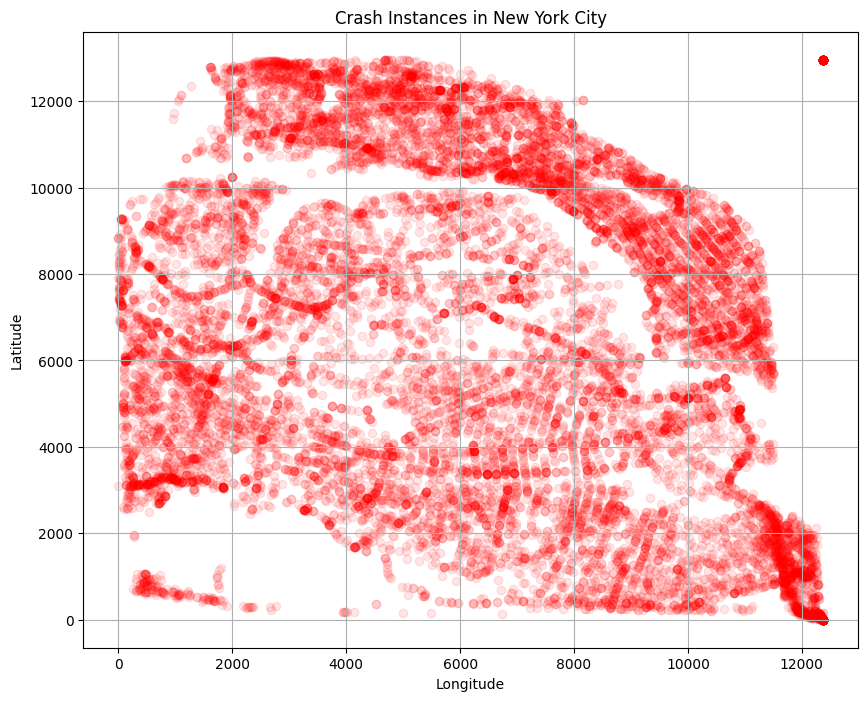

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'LATITUDE' and 'LONGITUDE' columns are now available in the DataFrame
latitude_values = merged_data['LATITUDE'].astype(float)
longitude_values = merged_data['LONGITUDE'].astype(float)

# Create a scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(longitude_values, latitude_values, marker='o', color='red', alpha=0.1)
plt.title('Crash Instances in New York City')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

In [ ]:
crash_occurred_column = merged_data['CRASH_OCCURRED']

# Display the unique values and their counts
print(crash_occurred_column.value_counts())

0    100417
1     25110
Name: CRASH_OCCURRED, dtype: int64


In [ ]:
import numpy as np

# Assuming merged_data is your DataFrame

# Replace 'M' with 1 and NaN with 0 in 'wxcodes' column
merged_data['wxcodes_encoded'] = np.where(merged_data['wxcodes'] == 'M', 1, 0)

# Print the updated DataFrame
print(merged_data['wxcodes_encoded'])



0         1
1         1
2         1
3         1
4         1
         ..
125522    0
125523    0
125524    0
125525    0
125526    0
Name: wxcodes_encoded, Length: 125527, dtype: int64


In [ ]:
import numpy as np

# Assuming merged_data is your DataFrame

# Replace 'M' with 1 and NaN with 0 in 'snowdepth' column
merged_data['snowdepth_encoded'] = np.where(merged_data['snowdepth'] == 'M', 1, 0)

# Print the updated DataFrame
print(merged_data['snowdepth_encoded'])


0         1
1         1
2         1
3         1
4         1
         ..
125522    0
125523    0
125524    0
125525    0
125526    0
Name: snowdepth_encoded, Length: 125527, dtype: int64


In [ ]:
# Assuming merged_data is your DataFrame

# Specify columns to encode
columns_to_encode = ['TEMP_RANGES', 'PRECIP_CATEGORY', 'WIND_SPEED_CATEGORY',
                      'VISIBILITY_CATEGORY', 'SIGNIFICANT_WEATHER']

# Convert categorical columns to numerical type (e.g., int)
merged_data[columns_to_encode] = merged_data[columns_to_encode].astype('category').apply(lambda x: x.cat.codes)

# Handle missing values by filling NaN with 0
merged_data[columns_to_encode] = merged_data[columns_to_encode].fillna(0)

# Print the updated DataFrame with numerical values
print(merged_data[columns_to_encode])



        TEMP_RANGES  PRECIP_CATEGORY  WIND_SPEED_CATEGORY  \
0                 4                0                    1   
1                 3                0                    0   
2                 4                0                    0   
3                 4                0                    1   
4                 4                0                    2   
...             ...              ...                  ...   
125522           -1               -1                   -1   
125523           -1               -1                   -1   
125524           -1               -1                   -1   
125525           -1               -1                   -1   
125526           -1               -1                   -1   

        VISIBILITY_CATEGORY  SIGNIFICANT_WEATHER  
0                         3                    0  
1                         3                    0  
2                         3                    0  
3                         4                    0  
4           

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Assuming merged_data is your DataFrame

# Features for prediction
features = ['wxcodes_encoded', 'tmpf', 'sped', 'p01i', 'vsby', 'snowdepth_encoded',
            'TEMP_RANGES', 'PRECIP_CATEGORY', 'WIND_SPEED_CATEGORY', 'VISIBILITY_CATEGORY',
            'SIGNIFICANT_WEATHER']

# Target variable
target = 'CRASH_OCCURRED'

# Ensure that all specified columns exist in the DataFrame
selected_columns = features + [target]
if all(col in merged_data.columns for col in selected_columns):
    # Subset the data with the selected features
    selected_data = merged_data[selected_columns].dropna()

    # Split the data into features (X) and target (y)
    X = selected_data[features]
    y = selected_data[target]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create a Random Forest Classifier
    rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

    # Train the classifier
    rf_classifier.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = rf_classifier.predict(X_test)

    # Evaluate the performance of the classifier
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy:.2f}')

    # Display classification report
    print('Classification Report:')
    print(classification_report(y_test, y_pred))

else:
    print("Some specified columns are not found in the DataFrame.")


Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      4669

    accuracy                           1.00      4669
   macro avg       1.00      1.00      1.00      4669
weighted avg       1.00      1.00      1.00      4669



In [ ]:
# Fill with mean
merged_data['LATITUDE'].fillna(merged_data['LATITUDE'].mean(), inplace=True)
merged_data['LONGITUDE'].fillna(merged_data['LONGITUDE'].mean(), inplace=True)

# Fill with median
# merged_data['LATITUDE'].fillna(merged_data['LATITUDE'].median(), inplace=True)
# merged_data['LONGITUDE'].fillna(merged_data['LONGITUDE'].median(), inplace=True)

print(merged_data[['LATITUDE', 'LONGITUDE']])

print(merged_data.iloc[0])

         LATITUDE  LONGITUDE
0       40.482625 -73.498632
1       40.537332 -74.189127
2       40.482625 -73.498632
3       40.824392 -73.836293
4       40.605599 -73.959575
...           ...        ...
125522  40.482625 -73.498632
125523  40.482625 -73.498632
125524  40.482625 -73.498632
125525  40.482625 -73.498632
125526  40.482625 -73.498632

[125527 rows x 2 columns]
TIME_BLOCK                                 2012-07-01 01:00:00
CRASH DATE_x                                        07/01/2012
CRASH TIME                                                0:21
BOROUGH                                                    NaN
ZIP CODE                                                   NaN
LATITUDE                                             40.482625
LONGITUDE                                           -73.498632
NUMBER OF PERSONS INJURED                                  0.0
NUMBER OF PERSONS KILLED                                   0.0
NUMBER OF PEDESTRIANS INJURED                             

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import folium
from folium.plugins import HeatMap
import geopandas as gpd
from shapely.geometry import Point
from IPython.display import display

# ... (your existing code)

# Get user input for weather conditions
user_input = {}
for feature in features:
    user_input[feature] = float(input(f"Enter value for {feature}: "))

# Create a DataFrame with the user input
user_df = pd.DataFrame([user_input])

# Filter merged_data based on user input
filtered_data = merged_data.copy()
for feature, value in user_input.items():
    filtered_data = filtered_data[filtered_data[feature] == value]

# If there are crashes that correlate with user input, plot them on a map
if not filtered_data.empty:
    # Create a GeoDataFrame with the filtered data
    filtered_gdf = gpd.GeoDataFrame(filtered_data, geometry=gpd.points_from_xy(filtered_data['LONGITUDE'], filtered_data['LATITUDE']))

    # Create a map centered around New York City
    nyc_map = folium.Map(location=[40.7128, -74.0060], zoom_start=11)

    # Add a marker for each crash
    for idx, row in filtered_gdf.iterrows():
        folium.Marker([row['LATITUDE'], row['LONGITUDE']]).add_to(nyc_map)

    # Create a HeatMap layer
    heat_data = [[row['LATITUDE'], row['LONGITUDE']] for idx, row in filtered_gdf.iterrows()]
    HeatMap(heat_data).add_to(nyc_map)

    # Display the map
    display(nyc_map)
else:
    print("No crashes found that correlate with the input weather conditions.")


Enter value for wxcodes_encoded: 1
Enter value for tmpf: 80.0
Enter value for sped: 9.2
Enter value for p01i: 0.0
Enter value for vsby: 9.2
Enter value for snowdepth_encoded: 1
Enter value for TEMP_RANGES: 4
Enter value for PRECIP_CATEGORY: 0
Enter value for WIND_SPEED_CATEGORY: 1
Enter value for VISIBILITY_CATEGORY: 3
Enter value for SIGNIFICANT_WEATHER: 0
